In [408]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [409]:
A_1 = np.array([[int((i%2 == j%2))  for j in range(3)] for i in range(6)])
A_2 = np.ones((6, 3), dtype=int)
A_2[1::2,::2] = 0
A_2[::2, 1] = 0
print(A_1)


B = np.arange(1, 25)
B = B.reshape((6, 4))
B[1::2] = np.flip(B[1::2], axis=1)
print(B)
C = np.random.randint(2,11,(4,3)) * 8 + 2
print(C)
D = np.eye(4,4, dtype=int)
print(D)




S = np.block([
    [A_1, B],
    [C, D]
])
print(S)

F = np.zeros((10, 2), dtype=int)
print(F)

G = np.hstack((S, F))
print(G)

# YOUR CODE HERE

[[1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]]
[[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]
 [16 15 14 13]
 [17 18 19 20]
 [24 23 22 21]]
[[34 66 42]
 [82 34 50]
 [34 66 50]
 [82 66 26]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[ 1  0  1  1  2  3  4]
 [ 0  1  0  8  7  6  5]
 [ 1  0  1  9 10 11 12]
 [ 0  1  0 16 15 14 13]
 [ 1  0  1 17 18 19 20]
 [ 0  1  0 24 23 22 21]
 [34 66 42  1  0  0  0]
 [82 34 50  0  1  0  0]
 [34 66 50  0  0  1  0]
 [82 66 26  0  0  0  1]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [34 66 42  1  0  0  0  0  0]
 [82 34 50  0  1  0  0  0  0]
 [34 66 50  0  0  1  0  0  0]
 [82 66 26  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [410]:
def find_nearest_neighbour(X, a):
    min = (np.abs(X - a)).min()
    return X[np.abs(X - a) == min][0]
    # если ближайших несколько, то выводим одного, если всех, то удалить [0]
    
X = np.arange(0,10).reshape((2, 5))
a = 3.6
print(find_nearest_neighbour(X, a))

4


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [411]:
# Придумайте свои данные для примера, N >= 4
np.random.seed(42)
A = np.random.rand(4,4)
b = np.random.rand(4)
X = np.random.rand(4)

def very_strange_neural_network(A, b, X):
    return ((X @ (A @ A)) @ b)


print(very_strange_neural_network(A, b, X))

2.031416555368197


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [412]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return -min(np.sum(M[M < 0]),0)
# min - если вдруг воды на карте вообще нет

def find_max_height(M):
    assert M.max() >= 0, "На карте нет суши"
    return M.max()
    

In [413]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [414]:
def count_all_islands(a):
    return ((np.diff(a) == 1).sum() + a[0])
# a[0] - для случая, если массив сразу начинается с 1

In [415]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [416]:
def swap_mask_for_average(X, a):
    mean = np.mean(X)
    X[X > a] = mean
    return X

In [417]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [418]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.fliplr(M))

In [419]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

np.int64(3)

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [420]:
def create_mountain(a):
    part = a.reshape(-1,1) + a
    return(np.block([
        [part,part[:,::-1]],
        [part[::-1],part[::-1,::-1]]
        ]))

In [421]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [422]:
def custom_blur(P, C):
    N, M = P.shape
    new_N = N - C + 1
    new_M = M - C + 1
    result = np.zeros((new_N, new_M), dtype=float)
    
    for i in range(new_N):
        for j in range(new_M):
            submatrix = P[i:i+C, j:j+C]
            result[i, j] = np.sum(submatrix) / (C * C)
    
    return result

In [423]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2)

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [424]:
def check_successful_broadcast(*matrices):
# Перед тем как реализовывать функцию проверь, реализованна ли она в библиотеке
    try:
        result_shape = np.empty(matrices[0]).shape
        for shape in matrices[1:]:
            result_shape = np.broadcast(np.empty(result_shape), np.empty(shape)).shape
        return True
    except ValueError:
        return False

In [425]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [426]:
def pairwise_distances(A, B):
    # a_new = A.reshape(-1, A.shape[0], A.shape[1])
    # b_new = B.reshape(B.shape[0], -1, B.shape[1])
    # diff = a_new - b_new
    # sq_diff = np.square(diff)
    # sum_sq = np.sum(sq_diff, axis=-1)
    # answer = np.sqrt(sum_sq)
    # return answer
    
    # или для любителей одной строчки
    return np.sqrt(np.sum(np.square(A.reshape(-1, 1, A.shape[1]) - B.reshape(1, -1, B.shape[1])), axis=-1))

In [427]:
A = np.array([[2, 3, 4], [1, 0, 5], [6, 7, 8]])
B = np.array([[3, 5, 1], [4, 2, 6]])

pairwise_distances(A, B)

array([[3.74165739, 3.        ],
       [6.70820393, 3.74165739],
       [7.87400787, 5.74456265]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='orange'> Добаввляем новое измерение для каждой из матриц так, чтобы можно было применить broadcasting A (m,1,k) B (1,n,k), далле вычитаем, возводим в квадрат и скалдываем по нужной оси, извлекаем квдратные корень, в итоге получаем матрицу (m, n) с попарными евклидовыми расстояниями </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [429]:
data = pd.read_csv('data_numpy_lab.csv')
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [430]:
data['mass, gramm'] /= 1000
data['length, cm'] /= 100
data.rename(columns={
    'Unnamed: 0': 'ID',
    't, sec': 't',
    'sigma_t, sec': 'sigma_t',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'phi'
}, inplace=True)

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,ID,N,t,sigma_t,mass,length,phi
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [431]:
data['omega'] = 2.0 * np.pi * data['N'] / data['t']
data['sigma_omega'] = data['omega'] * data['sigma_t'] / data['t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['omega_down'] * data['sigma_t'] / data['t']
g = 9.8
data['momentum'] = data['mass'] * g * data['length']
data['momentum_down'] = data['mass'] * data['phi'] / (data['t'] ** 2) * (data['length'] ** 2)
data['sigma_momentum'] = data['momentum_down'] * 2.0 * data['sigma_t'] / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,ID,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [432]:
grouped_data = data.groupby('mass').mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,ID,N,t,sigma_t,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
mass,,,,,,,,,,,,,
0.142,18.0,3.0,282.8,1.0,1.21,0.158,0.066661,0.000236,0.000559,0.000002,1.683836,4.108862e-07,2.906917e-09
0.180,3.0,4.0,267.4,1.0,1.21,0.168,0.094012,0.000352,0.000629,0.000002,2.134440,6.202853e-07,4.645096e-09
0.216,8.0,3.0,230.8,1.0,1.08,0.164,0.081687,0.000354,0.000710,0.000003,2.286144,7.755223e-07,6.721701e-09
0.273,23.0,4.0,175.4,1.0,1.22,0.164,0.143300,0.000817,0.000935,0.000005,3.263988,2.166527e-06,2.470970e-08
0.341,28.0,5.0,208.4,1.0,1.10,0.166,0.150752,0.000723,0.000797,0.000004,3.675980,1.577406e-06,1.514038e-08
0.614,13.0,6.0,203.6,1.0,1.11,0.166,0.185194,0.000910,0.000815,0.000004,6.679092,3.030996e-06,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

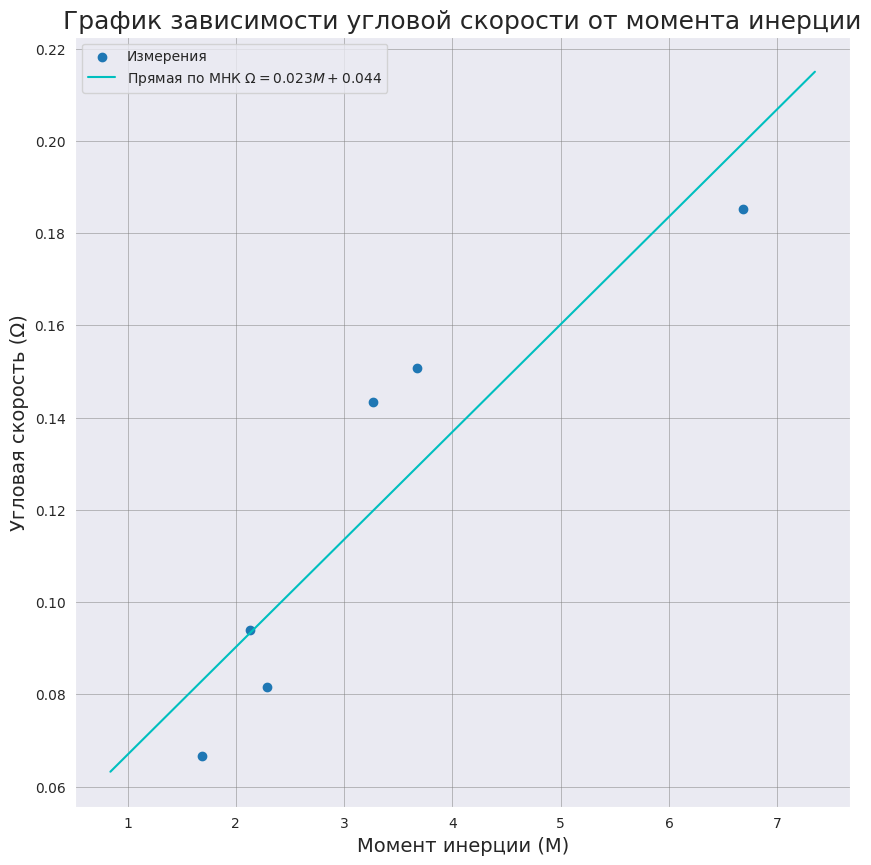

In [433]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Взял 1 степень из лабника
coefs = np.polyfit(momentum_np, omega_np, 1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

y_lsq = np.polyval(coefs,x_lsq)

fig = plt.figure(figsize=(10, 10))

plt.scatter(momentum_np, omega_np, label='Измерения')
# Поставили огарничение по кол-ву знаков в ответе (если нужны все, то убрать .3f)
plt.plot(x_lsq, y_lsq, label=f'Прямая по МНК $Ω = {coefs[0]:.3f}M + {coefs[1]:.3f}$', color = "c")

plt.xlabel('Момент инерции (M)', fontsize=14)
plt.ylabel('Угловая скорость (Ω)', fontsize=14)

plt.title('График зависимости угловой скорости от момента инерции', fontsize=18)

plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

plt.legend()

plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [434]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

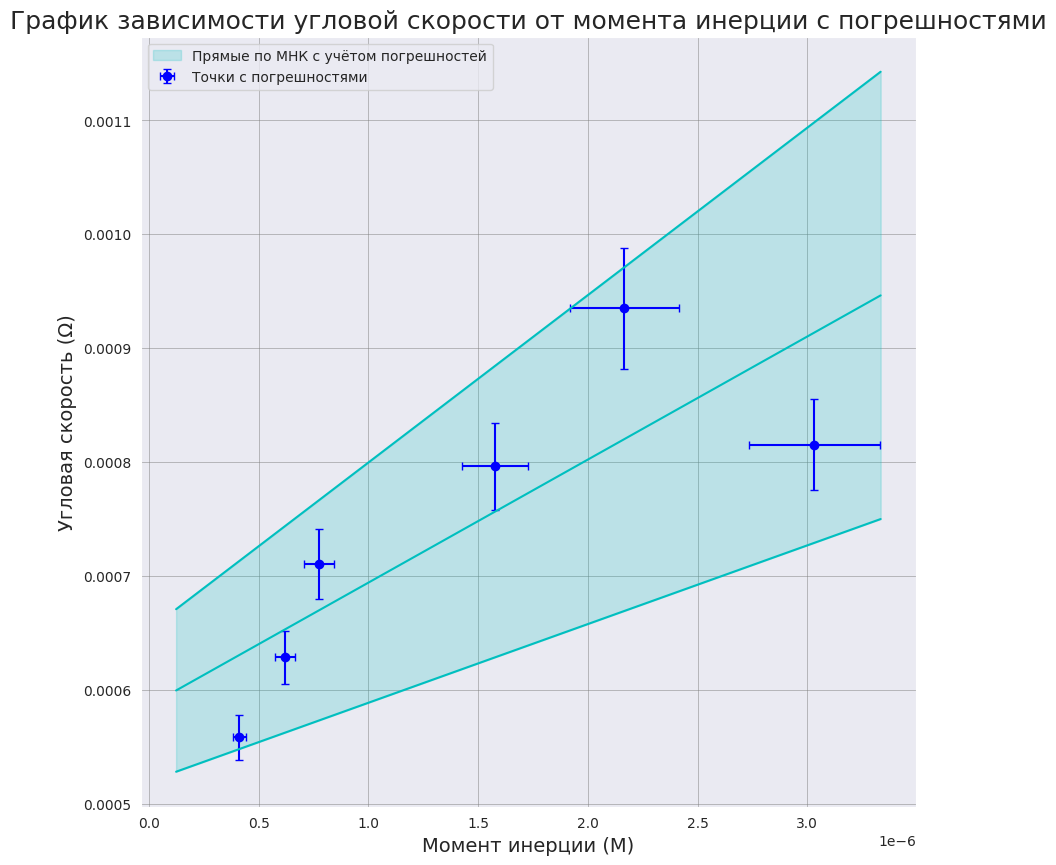

In [435]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

lsq_stds = np.sqrt(np.diag(cov))

y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval(coefs - lsq_stds, x_lsq)
y_lsq_upper = np.polyval(coefs + lsq_stds, x_lsq)

fig = plt.figure(figsize=(10, 10))

plt.errorbar(momentum_down_np, omega_down_np, yerr=grouped_data['sigma_down'], xerr=grouped_data['sigma_momentum'], fmt='o', label='Точки с погрешностями', color='blue', capsize=3)

plt.plot(x_lsq, y_lsq, color='c')
plt.plot(x_lsq, y_lsq_lower, color='c')
plt.plot(x_lsq, y_lsq_upper, color='c')

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='c', label='Прямые по МНК с учётом погрешностей', alpha=0.2)

plt.xlabel('Момент инерции (M)', fontsize=14)
plt.ylabel('Угловая скорость (Ω)', fontsize=14)

plt.title('График зависимости угловой скорости от момента инерции с погрешностями', fontsize=18)

plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

plt.legend()
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [436]:
sns.set_style("darkgrid")

In [437]:
# Так можно импортировать последнюю версию, источник - www.kaggle.com

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")
iris = pd.read_csv(path+'/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [438]:
iris = iris.drop('Id', axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [439]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

In [440]:
iris.rename(columns={
    'SepalLengthCm': 'Длина чашелистика',
    'SepalWidthCm': 'Ширина чашелистика',
    'PetalLengthCm': 'Длина лепестка',
    'PetalWidthCm': 'Ширина лепестка',
    'Species': 'Вид'
}, inplace=True)

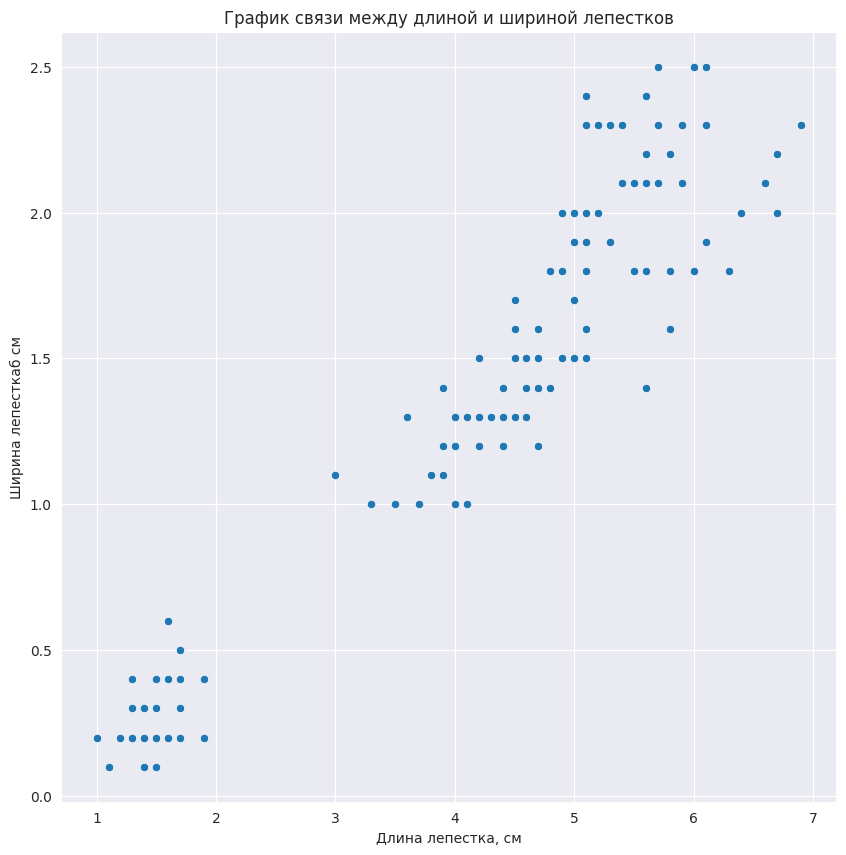

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='Длина лепестка', y='Ширина лепестка', data=iris)

plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепесткаб см')
plt.title('График связи между длиной и шириной лепестков')

plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='orange'> Видны облака группировок точек, но при это на графике не отображены принадлежности к разным видам, а у нас эти данные есть</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

<Figure size 1000x1000 with 0 Axes>

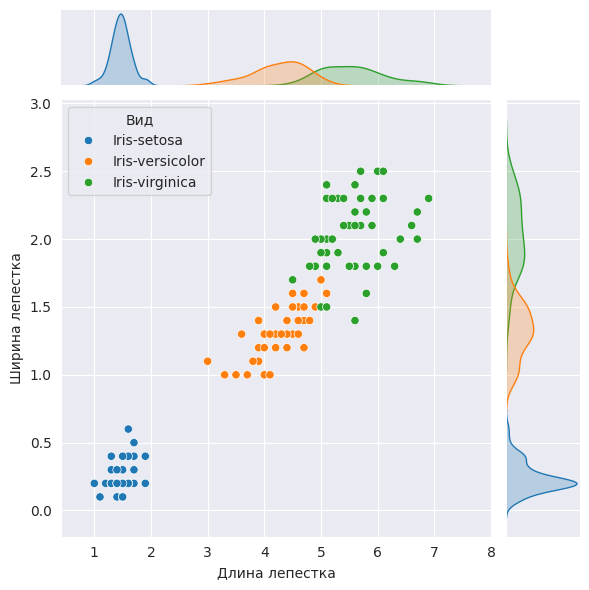

In [442]:
plt.figure(figsize=(10, 10))
sns.jointplot(x='Длина лепестка', y='Ширина лепестка', data=iris, hue='Вид')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.show()

<Figure size 1000x1000 with 0 Axes>

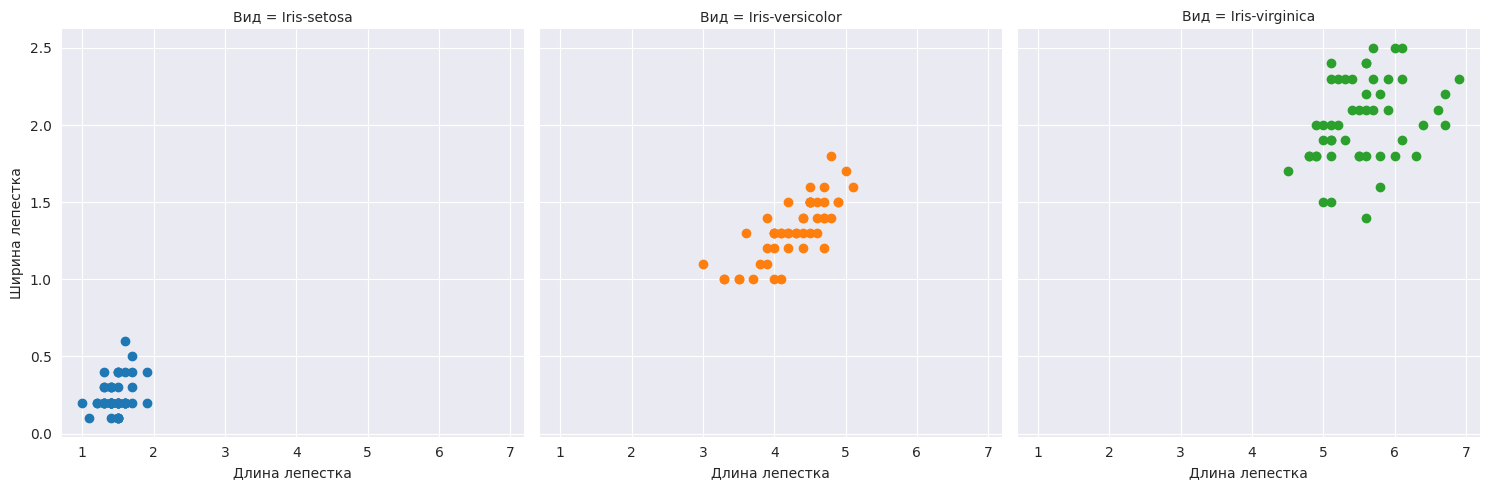

In [443]:
plt.figure(figsize=(10, 10))
graph = sns.FacetGrid(iris, hue="Вид", col="Вид", height=5)
graph.map(plt.scatter, "Длина лепестка", "Ширина лепестка")



Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='orange'> После добавления разделения групп ирисов по цветама стали видны чёткие облака точек, теперь мы понимаем, чем различаются разные виды. Самый лучший метод для меня - joinplot - есть разделение по цветам, при этом все данные на одном графике, а значит нет пустот и сравнение данных проще </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

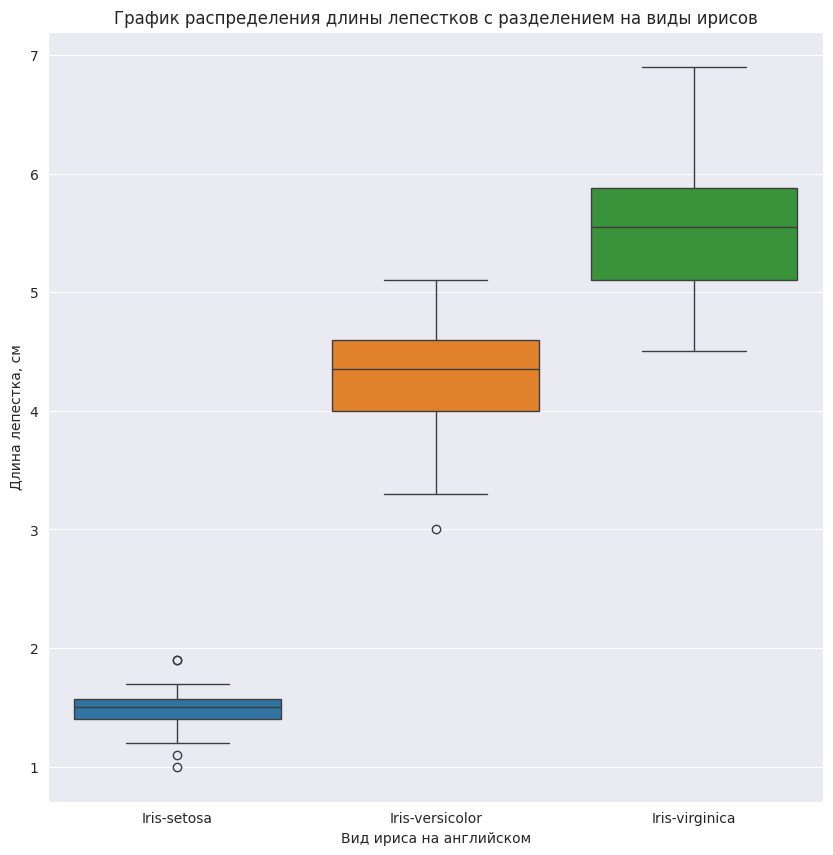

In [444]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Вид', y='Длина лепестка', hue="Вид", data=iris)
plt.xlabel('Вид ириса на английском')
plt.ylabel('Длина лепестка, см')
plt.title('График распределения длины лепестков с разделением на виды ирисов')
plt.show()

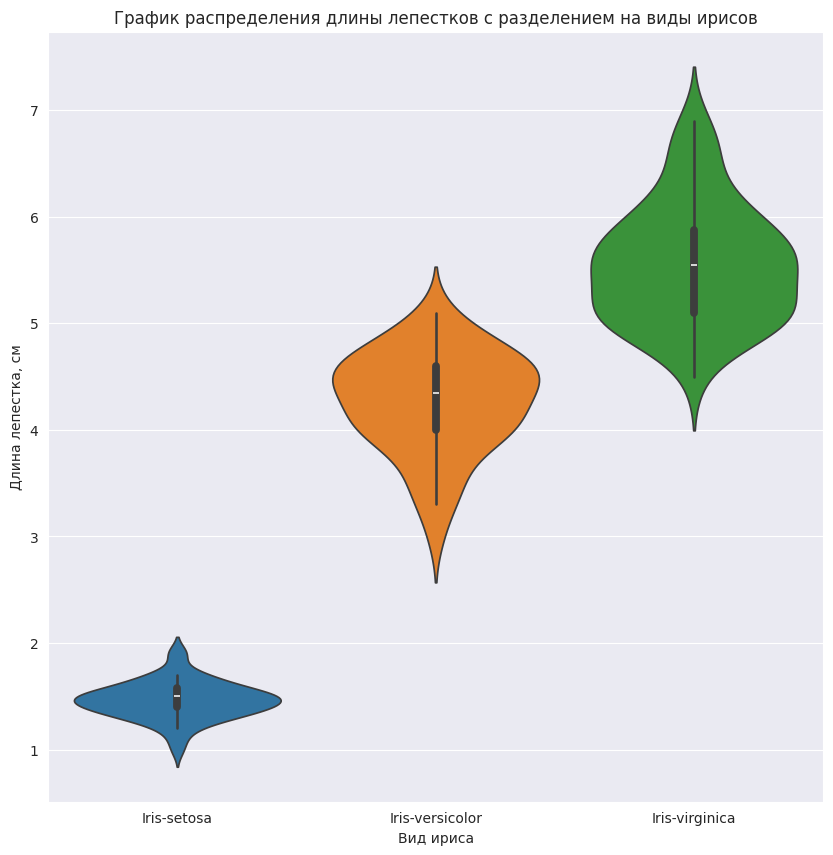

In [445]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='Вид', y='Длина лепестка', hue="Вид", data=iris)
plt.xlabel('Вид ириса')
plt.ylabel('Длина лепестка, см')
plt.title('График распределения длины лепестков с разделением на виды ирисов')
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='orange'> violinplot больше нравится мне и по информативности и по визуалу, разброс длины лепестка у сентозы гораздо меньше, чем у двух остальных, также можем заметить, что при одной длине лепестка мб абсолютно разные виды, например при 4,8, равновероятно вергиника или верзиколор  </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

<Figure size 1000x1000 with 0 Axes>

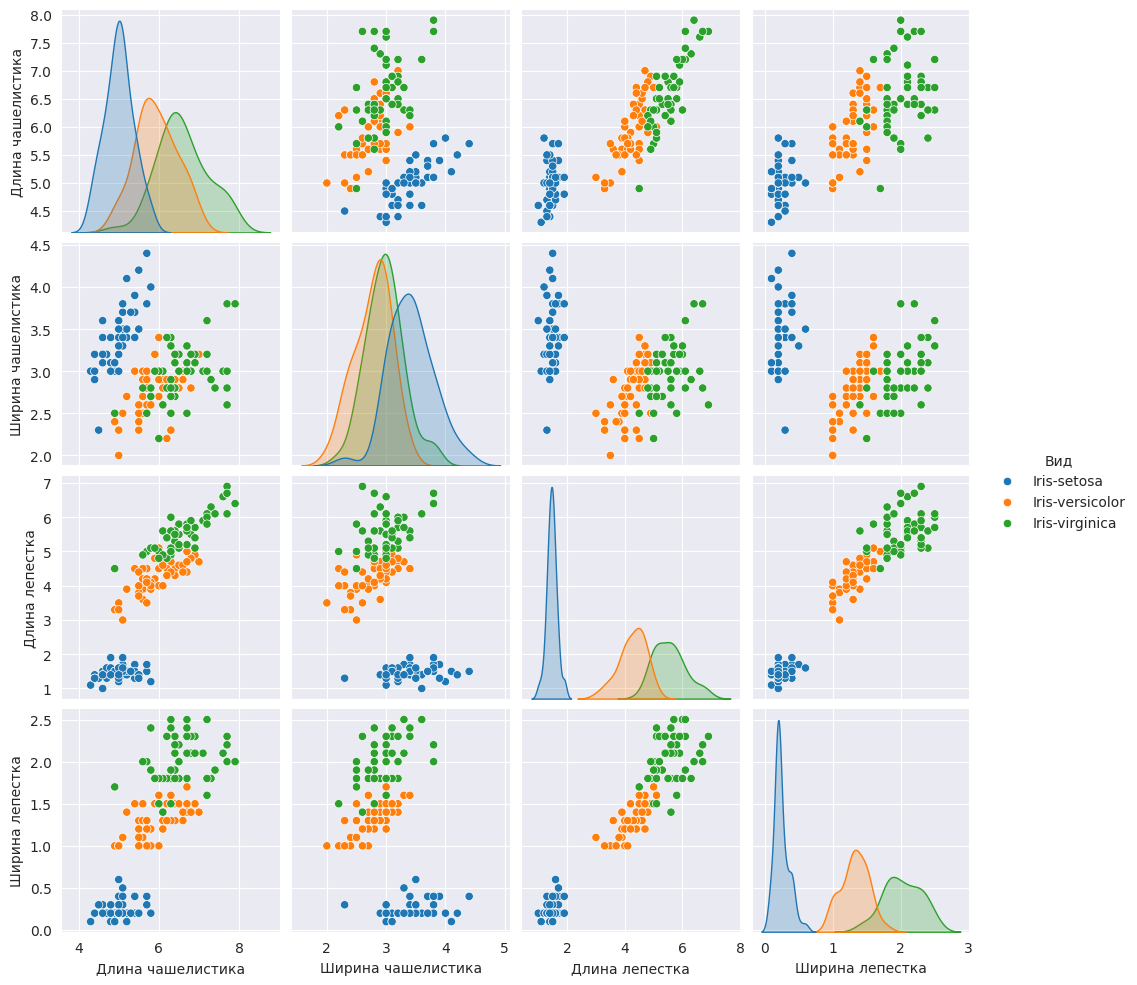

In [446]:
plt.figure(figsize=(10, 10))
# явно указал kde, по-умолчанию - autoэто комментируется ниже
sns.pairplot(iris, hue='Вид', diag_kind='kde')

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='orange'> Если использовать только два признака из всех, то всегда существуют два вида, которые нельзя будет отличить при определённом наборе параметров </font>

Какие графики находятся на диагонали этой таблицы?

<font color='orange'> KDE (Kernel Density Estimation) (Ядерная оценка плотности - рус) график — это метод оценки вероятностной плотности случайной величины. Он используется для визуализации распределения данных, позволяя увидеть, как часто значения встречаются в наборе данных. KDE график представляет собой сглаженную версию гистограммы, где вместо столбцов используется непрерывная кривая. </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='orange'> Я так понимаю, что изначально по-умолчанию должно было выбраться hist, а дальше мы бы заменили на kde, тк по мне kde чуть более информативна, но в доках написано, что по умолчанию параметр auto и внутри выбирается между kde и hist в зависимости от hue </font>

<Figure size 1000x1000 with 0 Axes>

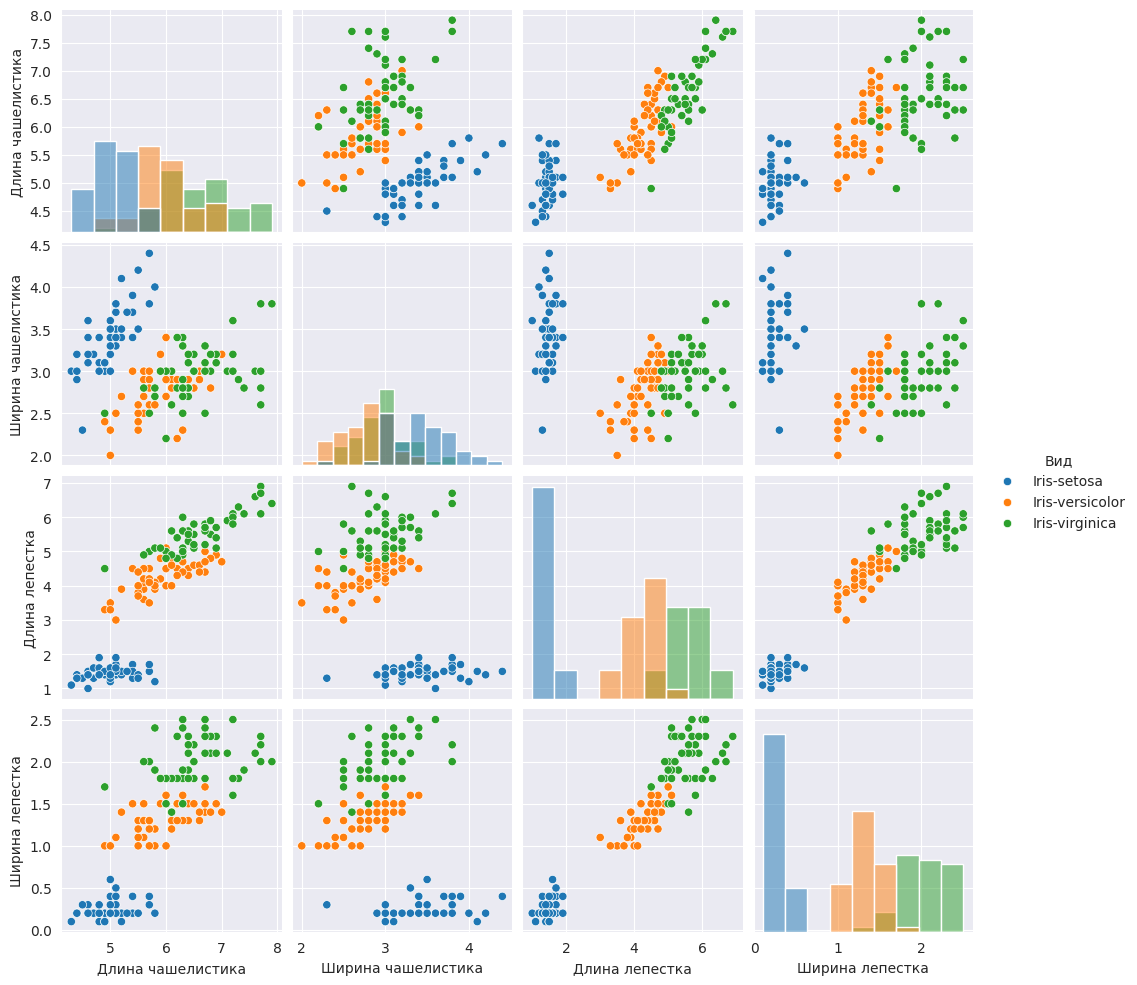

In [447]:
plt.figure(figsize=(10, 10))
# Поменяли параметр на hist
sns.pairplot(iris, hue='Вид', diag_kind='hist')